# Task 4.5. DSIHE 4.1. - 4.6.
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "jet.bmp"

## Loading images

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display the basic histogram

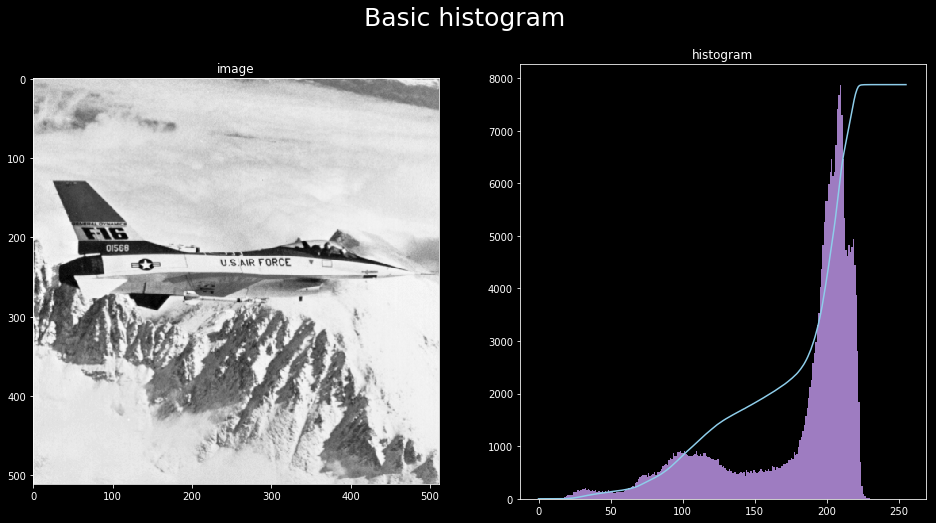

In [7]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Basic histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Determination of the point of division

In [18]:
X, Y = image.shape
values = abs(cdf - (X*Y / 2))
lm = np.argmin(values)

In [19]:
lm

199

## DSIHE

In [42]:
H1 = cdf[:lm]
H1 = hist_left/hist_left.sum()
C1 = H1.cumsum()

H2 = cdf[lm:]
H2 = hist_right/hist_right.sum()
C2 = H2.cumsum()

In [44]:
LUT = np.append(lm * C1, lm + 1 + (255 - lm) * C2).astype(int)

In [46]:
LUT

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,   4,   4,
         4,   4,   4,   5,   5,   5,   5,   6,   6,   6,   6,   7,   7,
         7,   8,   8,   9,   9,   9,  10,  10,  11,  11,  12,  12,  13,
        13,  14,  15,  15,  16,  17,  17,  18,  19,  20,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  36,
        37,  38,  39,  41,  42,  43,  44,  46,  47,  49,  50,  51,  53,
        54,  56,  57,  59,  60,  62,  63,  65,  67,  68,  70,  71,  73,
        75,  76,  78,  80,  81,  83,  85,  87,  88,  90,  92,  94,  96,
        97,  99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121,
       123, 125, 127, 129, 131, 134, 136, 138, 140, 142, 145, 14

In [47]:
image_dsihe = cv2.LUT(image, LUT)

In [48]:
# creation of a cumulative histogram
hist,bins = np.histogram(image_dsihe.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_dsihe = cdf * hist.max()/ cdf.max()

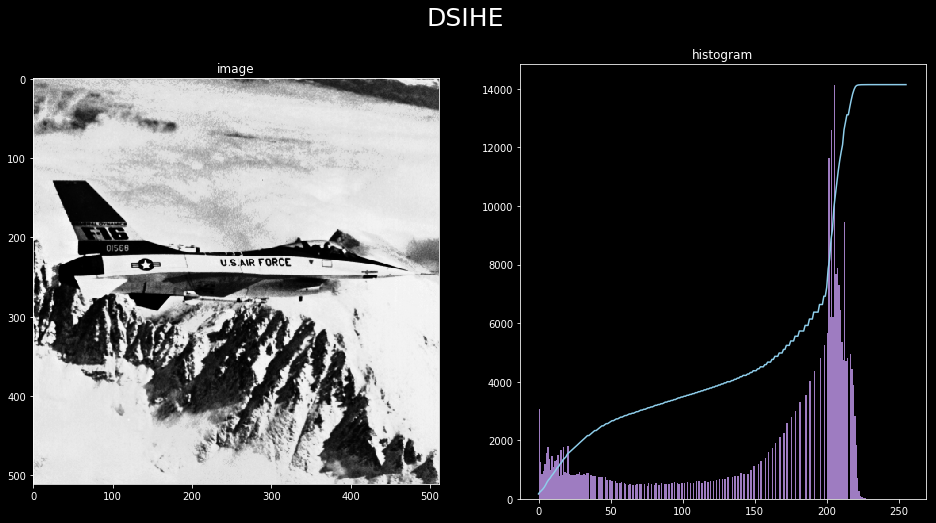

In [41]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('DSIHE', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_dsihe, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_dsihe.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_dsihe, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Equalized histogram

In [49]:
# equalized histogram
image_eq = cv2.equalizeHist(image)

# creation of a cumulative histogram
hist,bins = np.histogram(image_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_eq = cdf * hist.max()/ cdf.max()

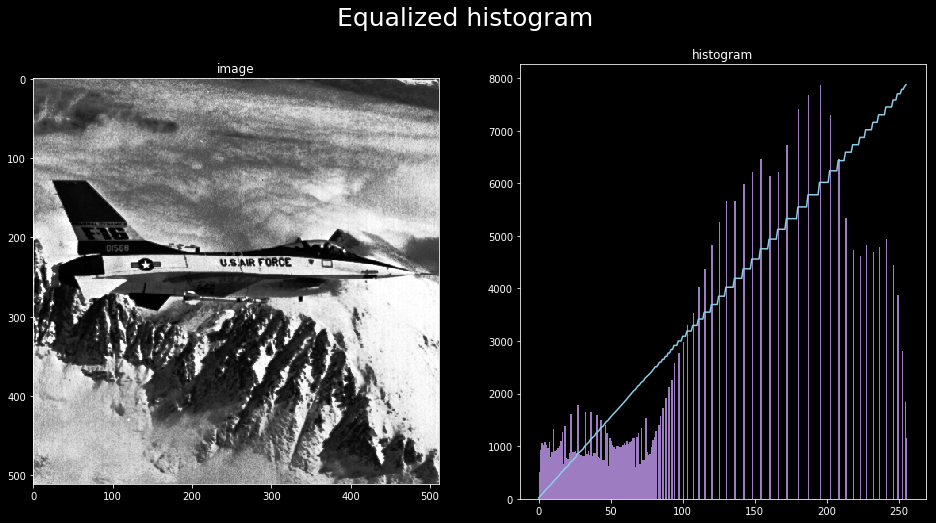

In [50]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Equalized histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_eq, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_eq.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_eq, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()